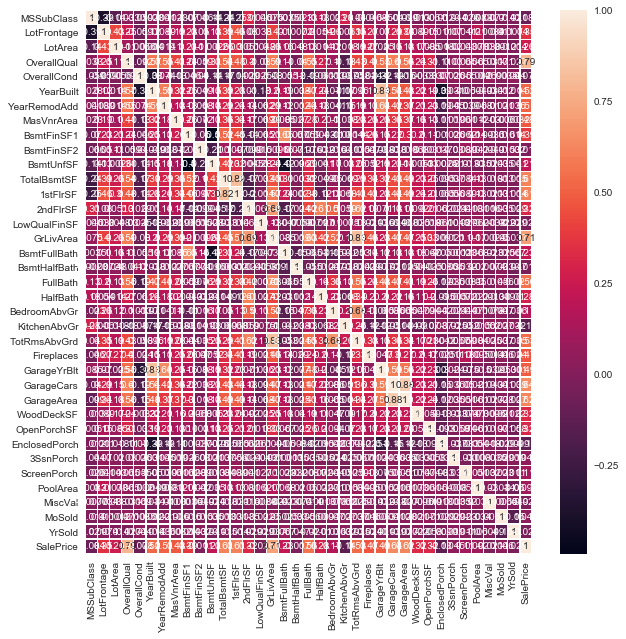

In [2]:
# 아웃라이어 고려 이전 상관계수 df
%matplotlib inline
df_raw = pd.read_csv('../train.csv')
intcolum_name=[1, 3, 4, 17, 18, 19, 20, 26, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56,
  59, 61, 62, 66, 67, 68, 69, 70, 71, 75, 76, 77, 80]  ## 데이터가 숫자인 컬럼번호    
df = df_raw.iloc[:, intcolum_name]
df_1 = df.iloc[:]
heat= df_1.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
            

In [3]:
df_cor_raw = heat.iloc[-1]   ## y값과의 상관관계 df 생성
df_cor_raw = pd.DataFrame(df_cor_raw)
df_cor_raw.head()

,SalePrice
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856


# y값에서 아웃라이어 제거 후 

In [4]:
df_DOY = pd.read_csv('new_train.csv') ## y값의 아웃라이어 제거한 csv(61개 row제거)
                                      ## DOY = Delete outlier of y value

In [5]:
intcolum_name=[1, 3, 4, 17, 18, 19, 20, 26, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56,
  59, 61, 62, 66, 67, 68, 69, 70, 71, 75, 76, 77, 80]  ## 데이터가 숫자인 컬럼번호
    
df_DOY_int = df_DOY.iloc[:, intcolum_name] 
df_DOY_int.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1394,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1395,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1396,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1397,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125
1398,20,75.0,9937,5,6,1965,1965,0.0,830,290,...,736,68,0,0,0,0,0,6,2008,147500


In [6]:
heat_DOY_int = df_DOY_int.corr()
heat_DOY_intp = heat_DOY_int.iloc[-1]   ## y값과의 상관관계 df 생성

df_cor_DOY = pd.DataFrame(heat_DOY_intp)
df_cor_DOY.head()

,SalePrice
MSSubClass,-0.060111
LotFrontage,0.319597
LotArea,0.249812
OverallQual,0.784294
OverallCond,-0.048005


In [7]:
df_cor_DOY['raw_cor'] = df_cor_raw['SalePrice']

df_cor_DOY['compare_value'] = df_cor_DOY['SalePrice'] - df_cor_DOY['raw_cor']
df_cor_DOY = df_cor_DOY.sort_values(by=['SalePrice'], ascending=False)
df_cor_DOY.iloc[:11]  ## 상관계수가 y값을 뺴기 전보다 얼마나 변했는지 compare_value를통해 확인

,SalePrice,raw_cor,compare_value
SalePrice,1.000000,1.000000,0.000000
OverallQual,0.784294,0.790982,-0.006687
GrLivArea,0.661325,0.708624,-0.047300
GarageCars,0.628013,0.640409,-0.012396
GarageArea,0.607230,0.623431,-0.016202
FullBath,0.577369,0.560664,0.016705
YearBuilt,0.564558,0.522897,0.041661
TotalBsmtSF,0.543508,0.613581,-0.070072
YearRemodAdd,0.541161,0.507101,0.034060
1stFlrSF,0.522785,0.605852,-0.083067


# y값의 아웃라이어들을 제거한 상관계수는 오히려 감소한 것이 많다


- 이러한 아웃라이어 제거는 알맞지 않다고 판단해야할 것 같다.

# 영향이 컸다고 판단한 컬럼들의 아웃라이어를 제거

In [8]:
df_DO1234_int = pd.read_csv('DO1234_train.csv')  ## 가장 영향이 큰 4개 컬럼(숫자형)의 아웃라이어 제거한 df
intcolum_name=[1, 3, 4, 17, 18, 19, 20, 26, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56,
  59, 61, 62, 66, 67, 68, 69, 70, 71, 75, 76, 77, 80]  ## 데이터가 숫자인 컬럼번호
    
df_DO1234_int = df_DO1234_int.iloc[:, intcolum_name]
df_DO1234_int.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1402,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1403,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1404,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1405,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125
1406,20,75.0,9937,5,6,1965,1965,0.0,830,290,...,736,68,0,0,0,0,0,6,2008,147500


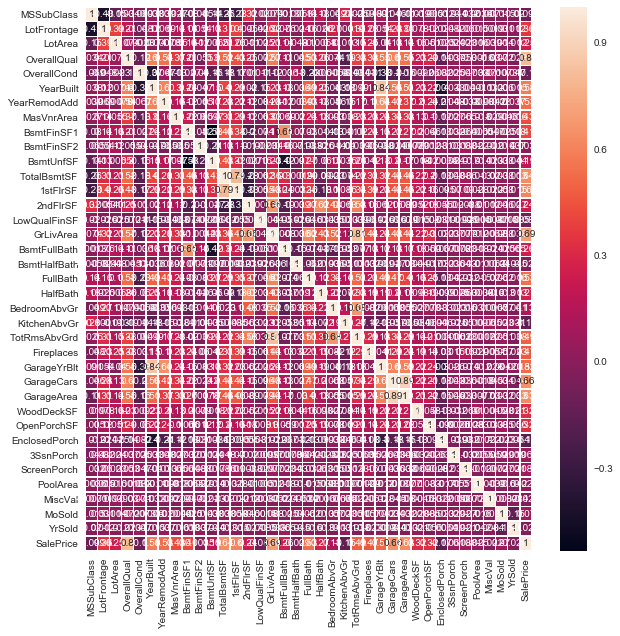

In [9]:
%matplotlib inline
df_heat2 = df_DO1234_int.iloc[:]
heat_DO1234_int = df_heat2.corr() ##상관계수 계산
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(heat_DO1234_int.iloc[:, :], annot=True, linewidths=.5, ax=ax)

In [10]:
heat_DO1234_intp = heat_DO1234_int.iloc[-1]   ## y값과의 상관관계 df 생성

df_cor_DO1234 = pd.DataFrame(heat_DO1234_intp)
df_cor_DO1234.head()

,SalePrice
MSSubClass,-0.099268
LotFrontage,0.356391
LotArea,0.254330
OverallQual,0.802405
OverallCond,-0.102102


In [11]:
df_cor_DO1234['raw_cor'] = df_cor_raw['SalePrice']
df_cor_DO1234['compare_value'] = df_cor_DO1234['SalePrice'] - df_cor_DO1234['raw_cor']
df_cor_DO1234 = df_cor_DO1234.sort_values(by=['SalePrice'], ascending=False)
df_cor_DO1234.iloc[:11] ## 상관계수가 컬럼 4개를 빼기 전보다 얼마나 변했는지 compare_value를통해 확인

,SalePrice,raw_cor,compare_value
SalePrice,1.000000,1.000000,0.000000
OverallQual,0.802405,0.790982,0.011424
GrLivArea,0.691414,0.708624,-0.017210
GarageCars,0.657404,0.640409,0.016995
TotalBsmtSF,0.638666,0.613581,0.025085
GarageArea,0.633822,0.623431,0.010391
1stFlrSF,0.604762,0.605852,-0.001090
YearBuilt,0.581436,0.522897,0.058539
FullBath,0.534821,0.560664,-0.025843
YearRemodAdd,0.531917,0.507101,0.024816


# 53개의 아웃라이러 제거 후, 결과는 생각보다 큰 변동이 없다.

상관계수의 값은 전반적으로 증가하였다고 말할 수 있으나 그 크기가 너무 작다.